In [1]:
import pandas as pd
import ast
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from metrics import mae_metric, rmse_metric, pearsonr_metric

In [2]:
df = pd.read_csv("./input/transquest/train.ende.df.short.tsv", sep='\t').set_index("index")
df.head(3)

,original,translation,scores,mean,z_scores,z_mean,model_scores
index,,,,,,,
0,José Ortega y Gasset visited Husserl at Freibu...,1934 besuchte José Ortega y Gasset Husserl in ...,"[100, 100, 100]",100.0,"[0.9553316582231767, 1.5523622744336512, 0.850...",1.119409,-0.102446
1,"However, a disappointing ninth in China meant ...",Eine enttäuschende Neunte in China bedeutete j...,"[61, 70, 87]",72.66666666666667,"[-1.1951539386222017, 0.04217636328434989, -0....",-0.488591,-0.431046
2,"In his diary, Chase wrote that the release of ...","In seinem Tagebuch, Chase schrieb, dass die Ve...","[52, 45, 49]",48.666666666666664,"[-1.6914198455865197, -1.2163118960067345, -3....",-2.207007,-0.351719


In [3]:
try : 
    df['scores'] = df['scores'].apply(ast.literal_eval)
    df['z_scores'] = df['z_scores'].apply(ast.literal_eval)
except Exception as e: 
    pass

In [4]:
round(np.array(df["z_scores"][0], dtype="float64").mean(),5) == round(df["z_mean"][0],5)

True

<AxesSubplot: xlabel='index'>

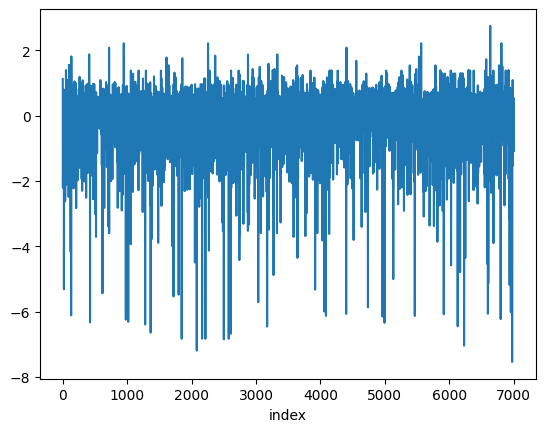

In [5]:
df["z_mean"].plot()

In [6]:
def get_score_from_zmean_da(z_mean): 
    CDF = norm.cdf(z_mean)
    return CDF

In [7]:
x = df["z_mean"][0]
get_score_from_zmean_da(x)

0.868517064057984

In [8]:
df["expert_score"] = df["z_mean"].apply(get_score_from_zmean_da)
df["model_score_prob"] = df["model_scores"].apply(get_score_from_zmean_da)


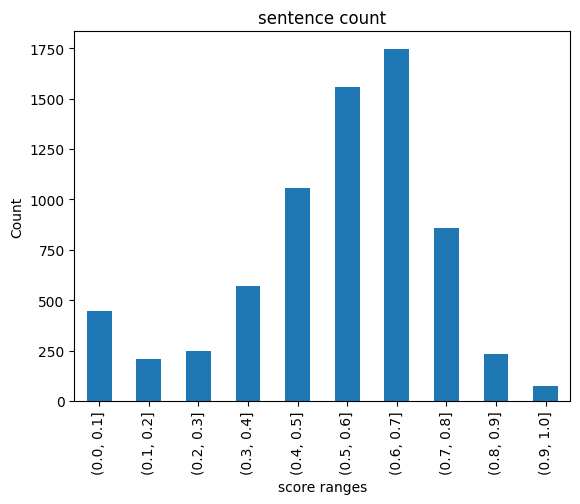

In [9]:
def dist_plot(df, col):
    bins = [i/10 for i in range(11)]
    groups = df.groupby(pd.cut(df[col], bins))
    counts = groups.size()
    counts.plot(kind='bar')
    plt.xlabel('score ranges')
    plt.ylabel('Count')
    plt.title('sentence count')
    plt.show()
dist_plot(df, "expert_score")

In [10]:
df.to_csv("exprt.csv")

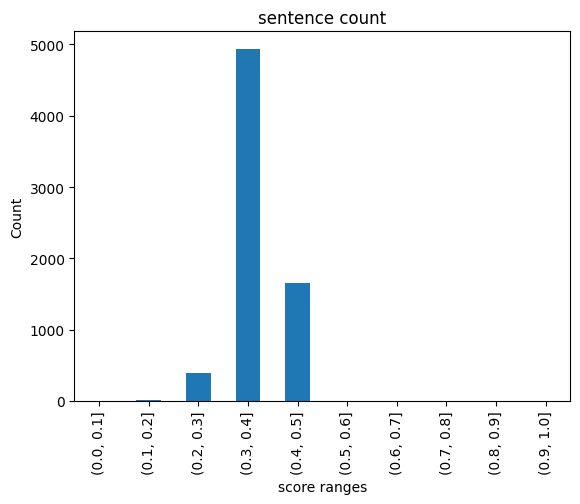

In [11]:
dist_plot(df, "model_score_prob")

In [12]:
def metrics_show(y1,y2):
    print(mae_metric(y1,y2))
    print(rmse_metric(y1,y2))

In [13]:
metrics_show(df["model_score_prob"], df["expert_score"])

Mean absolute error: 0.221
Root mean squared error: 0.253


<AxesSubplot: xlabel='index'>

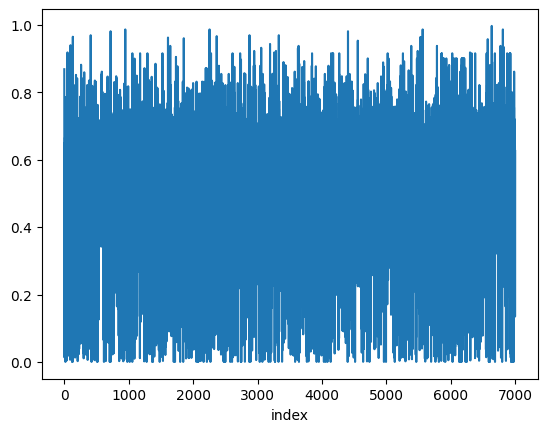

In [14]:
df["expert_score"].plot()

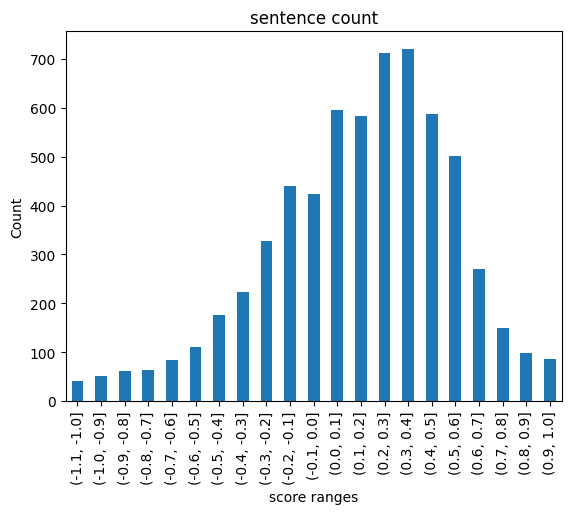

In [15]:
def dist_plot2(df, col):
    bins = [i/10 for i in range(-11,11)]
    groups = df.groupby(pd.cut(df[col], bins))
    counts = groups.size()
    counts.plot(kind='bar')
    plt.xlabel('score ranges')
    plt.ylabel('Count')
    plt.title('sentence count')
    plt.show()
dist_plot2(df, "z_mean")